In [1]:
using Revise
using Reparam
using Plots
using LaTeXStrings

In [2]:
ψ(x) = 0.5 * log(20x+1) / log(21) + 0.25 * (1 + tanh(20(x-0.5)) / tanh(10))
c2(x) = [cos(2π*x), sin(4π*x)]
c1(x) = c2(ψ(x))

c1 (generic function with 1 method)

## Curves Visualization

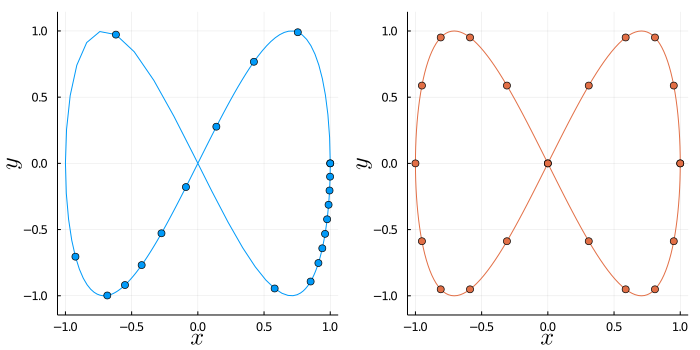

In [3]:
# Plotting Config
Tfine = 201
Tcoarse = 21


p1 = plot_curve(c1, Tfine, color=1, legend=false, xlabel=L"x", ylabel=L"y", guidefont=16, size=(600, 600))
plot_curve!(c1, Tcoarse, seriestype=:scatter, color=1, aspect_ratio=:equal, label="")
p2 = plot_curve(c2, Tfine, color=2, legend=false, xlabel=L"x", ylabel=L"y", guidefont=16, size=(600, 600))
plot_curve!(c2, Tcoarse, seriestype=:scatter, color=2, aspect_ratio=:equal)
plot(p1, p2, size=(700, 350))

## Qmap Visualization 

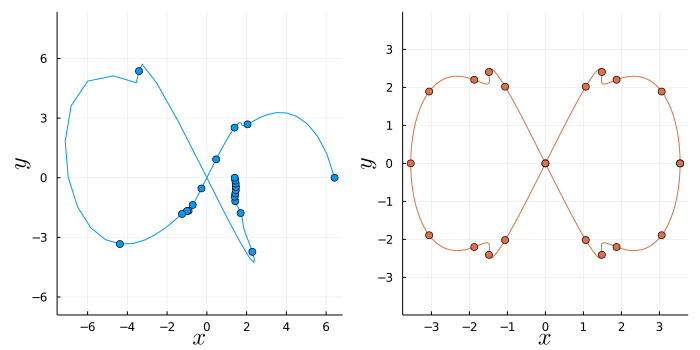

In [4]:
q = Qmap(c1)
r = Qmap(c2)


# Plotting Config
Tfine = 201
Tcoarse = 21


p1 = plot_curve(q, Tfine, color=1, legend=false, xlabel=L"x", ylabel=L"y", guidefont=16, size=(600, 600))
plot_curve!(q, Tcoarse, seriestype=:scatter, color=1, aspect_ratio=:equal, label="")
p2 = plot_curve(r, Tfine, color=2, legend=false, xlabel=L"x", ylabel=L"y", guidefont=16, size=(600, 600))
plot_curve!(r, Tcoarse, seriestype=:scatter, color=2, aspect_ratio=:equal)

plot(p1, p2, size=(700, 350))

## Perform Reparametrization 

In [12]:
I = GaussLegendre(128)
proj = FourierProjector(3)
@time res, rn = reparametrize(q, r, proj; I=I, rtol=1e-6, maxiter=100);

 ----------------------------------------------------------------------------------
| Iter | Error            | εmax             | εi               | ||dγ||           | |f_i - f_{i-1}|/ |fi| | 
----------------------------------------------------------------------------------
|    0 | 9.4332495335e+00 |                  |                  |                  |
|    1 | 7.9168639913e+00 | 2.4633325562e-03 | 1.2316662781e-03 | 3.0166692272e+01 | 1.6074901197e-01 |
|    2 | 6.9133351026e+00 | 2.2326792553e-03 | 1.1163396277e-03 | 3.1798971092e+01 | 1.2675838436e-01 |
|    3 | 5.9132127165e+00 | 2.2029181771e-03 | 1.1014590885e-03 | 3.1749162189e+01 | 1.4466568902e-01 |
|    4 | 4.9753570872e+00 | 2.2329408271e-03 | 1.1164704135e-03 | 3.0592501671e+01 | 1.5860339790e-01 |
|    5 | 3.9722757843e+00 | 2.1129138161e-03 | 1.0564569080e-03 | 3.2859016536e+01 | 2.0160991168e-01 |
|    6 | 3.0229317344e+00 | 2.1689643373e-03 | 1.0844821686e-03 | 2.9690529033e+01 | 2.3899248225e-01 |
|    7 | 2.262

|   77 | 1.1028198458e+00 | 2.7813758264e-03 | 3.4811081056e-05 | 3.0974207119e+01 | 7.4491820185e-04 |
|   78 | 1.0987343338e+00 | 2.6854396653e-03 | 4.6104753646e-05 | 4.1314401781e+01 | 3.7046050981e-03 |
|   79 | 1.0961606897e+00 | 2.6451234180e-03 | 3.3105776226e-05 | 2.9359704768e+01 | 2.3423715728e-03 |
|   80 | 1.0945032654e+00 | 2.8320733470e-03 | 4.8622222148e-05 | 4.3463337200e+01 | 1.5120267444e-03 |
|   81 | 1.0893334929e+00 | 2.4768745237e-03 | 3.1000010496e-05 | 2.7143124865e+01 | 4.7233961115e-03 |
|   82 | 1.0859467838e+00 | 3.0586762683e-03 | 4.7261372463e-05 | 3.8526800390e+01 | 3.1089736945e-03 |
|   83 | 1.0840431935e+00 | 2.8514309222e-03 | 3.2119087545e-05 | 2.6406554054e+01 | 1.7529314708e-03 |
|   84 | 1.0816934356e+00 | 3.1468674583e-03 | 4.8624065443e-05 | 3.9833618603e+01 | 2.1675869130e-03 |
|   85 | 1.0785973119e+00 | 2.7262154084e-03 | 3.0708634983e-05 | 2.5118649688e+01 | 2.8622932002e-03 |
|   86 | 1.0779217441e+00 | 3.3076609385e-03 | 5.1108578314e-05 

## Results Plots 

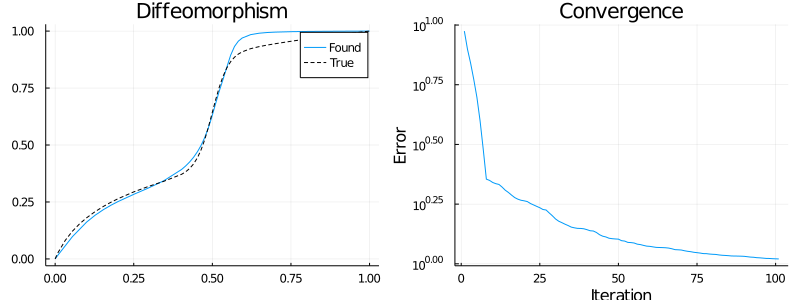

In [13]:
γ = rn.γ

p1 = plot(γ, 0 , 1, label="Found")
plot!(ψ, 0, 1, label="True", ls=:dash, c=:black, title="Diffeomorphism")
p2 = plot(res.errors, yscale=:log10, ylabel="Error", xlabel="Iteration", title="Convergence",
    legend=false)

plot(p1, p2, size=(800, 300))

## Coordinate Functions
### Before and After Matching

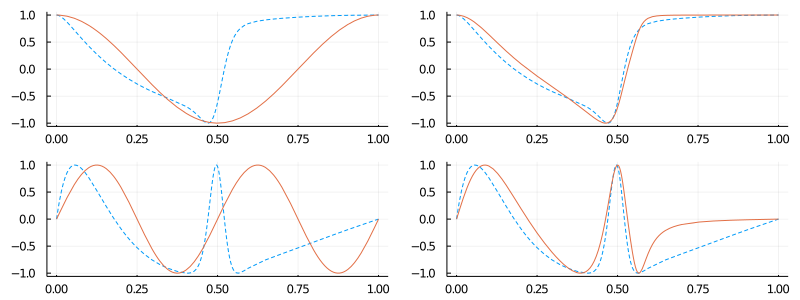

In [7]:
p1 = plot(x -> c1(x)[1], 0, 1, ls=:dash, legend=false)
plot!(x -> c2(x)[1], 0, 1)

p3 = plot(x -> c1(x)[2], 0, 1, ls=:dash, legend=false)
plot!(x -> c2(x)[2], 0, 1)

p2 = plot(x -> c1(x)[1], 0, 1, ls=:dash, legend=false)
plot!(x -> c2(γ(x))[1], 0, 1)

p4 = plot(x -> c1(x)[2], 0, 1, ls=:dash, legend=false)
plot!(x -> c2(γ(x))[2], 0, 1)

plot(p1, p2, p3, p4, size=(800, 300))